In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('datafolda/Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
df = df.drop(['Channel', 'Region'], axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters = 3, random_state = 0)

In [17]:
# モデルに学習させる
model.fit(sc_df)

KMeans(n_clusters=3, random_state=0)

In [19]:
model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [21]:
sc_df['cluster'] = model.labels_
sc_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2


In [23]:
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,1.523225,-0.136629,-0.245823,1.038595,-0.409281,0.305114
1,-0.242638,1.943918,2.138295,-0.042127,2.076593,0.646200
2,-0.305934,-0.247152,-0.250504,-0.226214,-0.205140,-0.160539


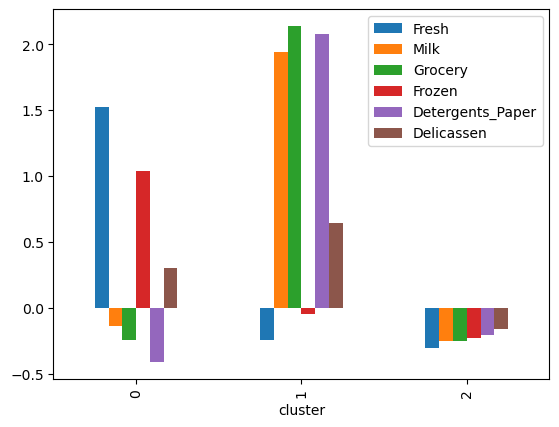

In [25]:
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind = 'bar')
plt.savefig("15-11.png")

In [27]:
sse_list = []
# クラスタ数2～30でSSEを調べる
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0)
    model.fit(sc_df)
    sse = model.inertia_ # SSEの計算
    sse_list.append(sse)
sse_list

[2184.1520787874542,
 1650.770187770802,
 1358.68267333124,
 1084.98807719229,
 976.7895922045107,
 873.0879648315713,
 819.2521461941692,
 718.6803804619203,
 673.6791943459301,
 633.9487005583329,
 614.0405938226071,
 555.1324949163234,
 527.8900171008177,
 476.33162361483915,
 440.47081977529575,
 420.2362471705122,
 399.8512140784549,
 388.6095198127215,
 359.93689445935956,
 337.73217588991844,
 308.5281495681334,
 292.64883855546543,
 282.826623775877,
 272.4244531336815,
 262.87268751542445,
 270.6723720639327,
 255.73187196988,
 237.71231575184254,
 230.80420448010835]

<Axes: >

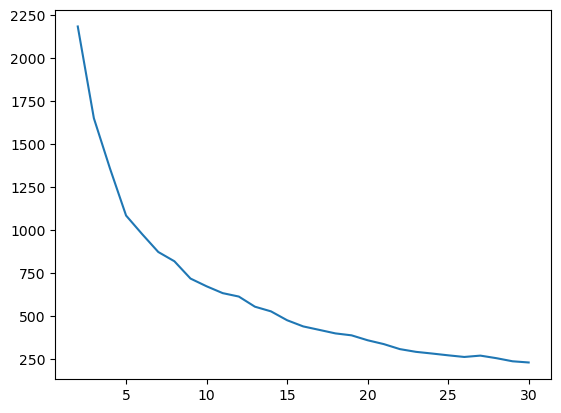

In [29]:
se = pd.Series(sse_list)
num = range(2, 31) # range関数で2～30の整数列を作る
se.index = num # シリーズのインデックスを変更
se.plot(kind = 'line')

In [37]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(sc_df)
sc_df['cluster'] = model.labels_
sc_df.to_csv('clustered_Wholesale.csv', index = False)

In [32]:
import pandas as pd
df = pd.read_csv('datafolda/Survived.csv')

In [34]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [36]:
df = df.fillna(df.mean(numeric_only=True))

In [38]:
dummy = pd.get_dummies(df['Sex'], drop_first = True, dtype=int)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('Sex', axis = 1)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.257551757549054 > -36.168456357979380). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.887063928937566 > -38.061488381634888). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.750726282305440 > -37.587573110269673). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/opt/an

<Axes: >

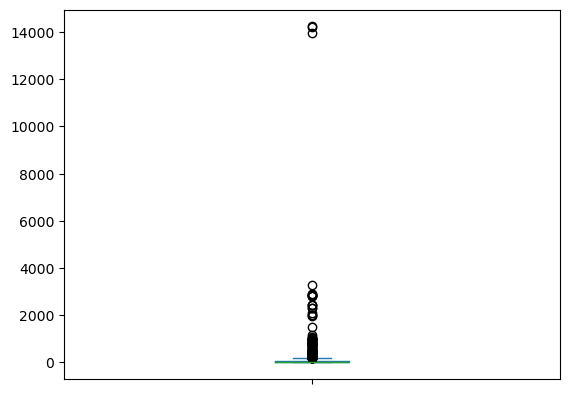

In [40]:
from sklearn.covariance import MinCovDet

mcd = MinCovDet(random_state=0)
mcd.fit(df)

maha_dis = mcd.mahalanobis(df)
tmp = pd.Series(maha_dis)
tmp.plot(kind = 'box')

In [45]:
num = tmp[ tmp > 10000 ].index

df = df.drop(num)

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)

df2 = pd.DataFrame(sc_df, columns = df.columns)

In [44]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2, random_state = 0)
model.fit(df2)

df2['cluster'] = model.labels_

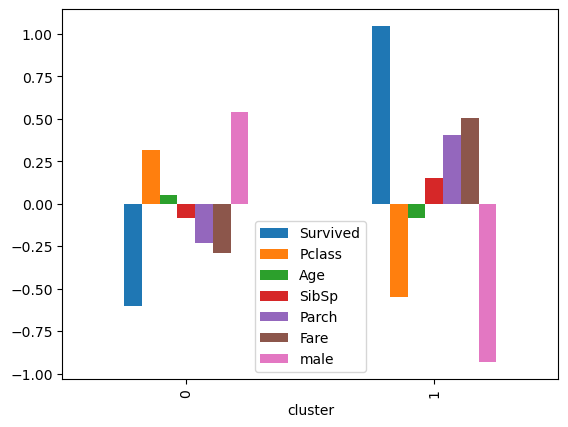

In [46]:
# %matplotlib inline
import matplotlib.pyplot as plt
c = df2.groupby('cluster').mean()
c.plot(kind = 'bar')
plt.savefig("ensyu15.png")